# Linear Regression using Medical Data

### The dataset contains 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges' where 'charges' is dependent variable.

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv('insurance.csv') #loading dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
df1=df.copy()

## Exploratory Data Analysis

For most of the Exploratory Data Analysis part, 'charges' will be used.

In [3]:
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df['smoker'].value_counts() #Total count of smoker and non smoker

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

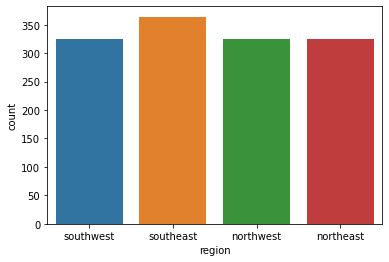

In [8]:
sns.countplot(x=df.region) #Distribution of Region

<AxesSubplot:xlabel='children', ylabel='count'>

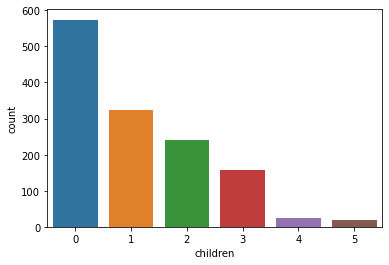

In [9]:
sns.countplot(x=df.children) #Distribution of Children

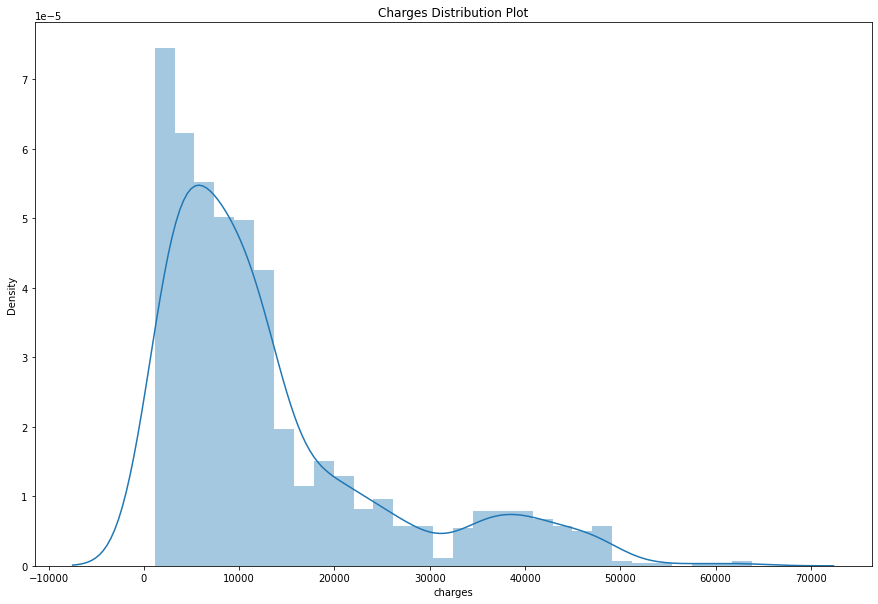

In [10]:
plt.figure(figsize=(15,10))

plt.title('Charges Distribution Plot')
sns.distplot(df.charges)

plt.show()

Most of distribution falls between 0 to 15000

<AxesSubplot:title={'center':'Charges Spread between smoker'}, xlabel='smoker', ylabel='charges'>

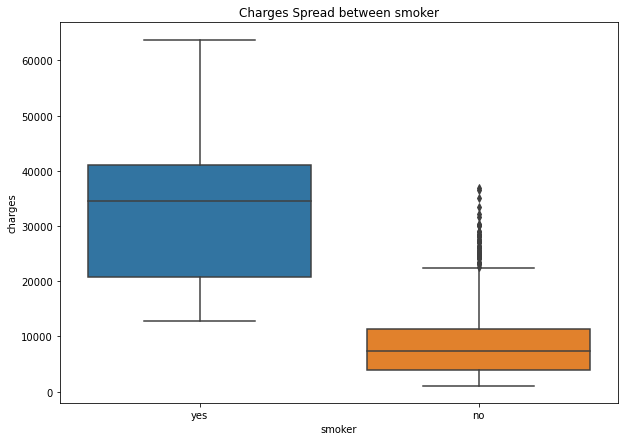

In [11]:
plt.figure(figsize=(10,7))
plt.title('Charges Spread between smoker')
sns.boxplot(x=df.smoker, y=df.charges)

Smoker has more insurance charges than non smoker

<AxesSubplot:title={'center':'Box plot of Charges vs Age'}, xlabel='age', ylabel='charges'>

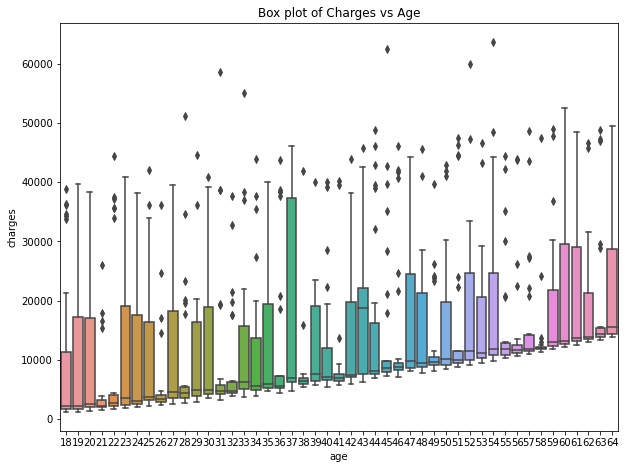

In [12]:
plt.figure(figsize=(10,7.5))
plt.title('Box plot of Charges vs Age')

sns.boxplot(x=df.age, y=df.charges)

Charges increases with age.

<AxesSubplot:title={'center':'Region VS Charges'}, xlabel='region', ylabel='charges'>

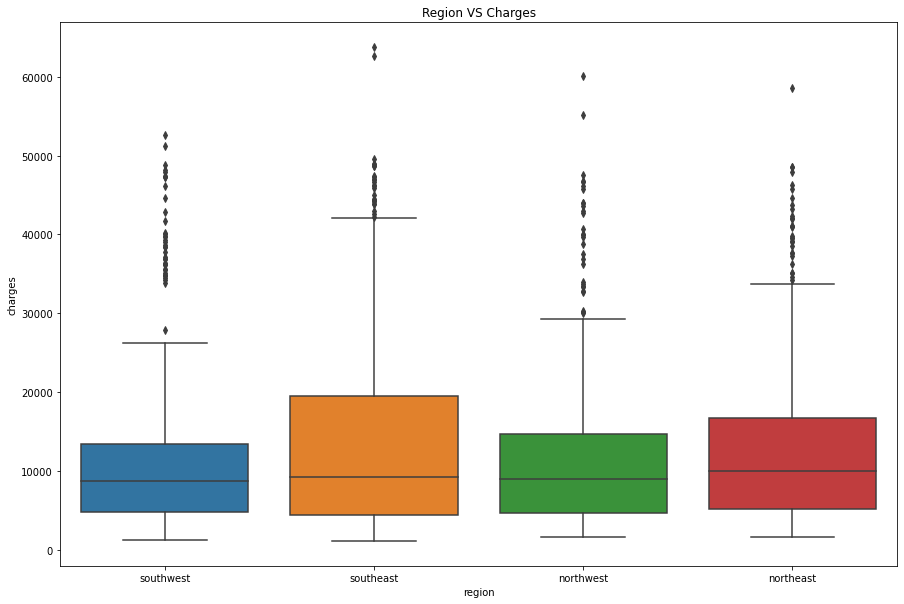

In [13]:
plt.figure(figsize=(15,10))
plt.title('Region VS Charges')
sns.boxplot(x=df.region,y=df.charges)

All region has average charges around 8000-9000 mark.

<AxesSubplot:title={'center':'Region VS Charges'}, xlabel='children', ylabel='charges'>

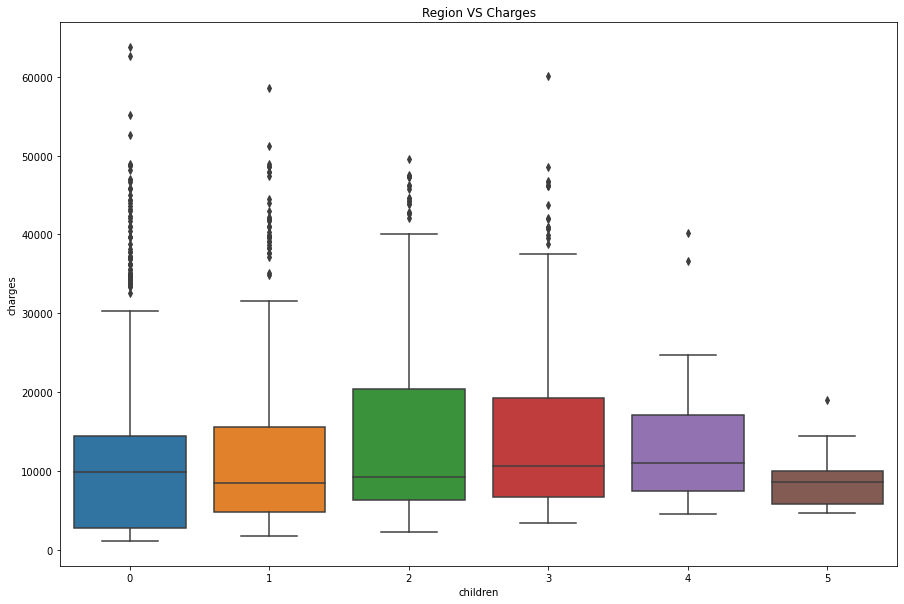

In [14]:
plt.figure(figsize=(15,10))
plt.title('Region VS Charges')
sns.boxplot(x=df.children,y=df.charges)

Number of children does not affect the insurance charges.

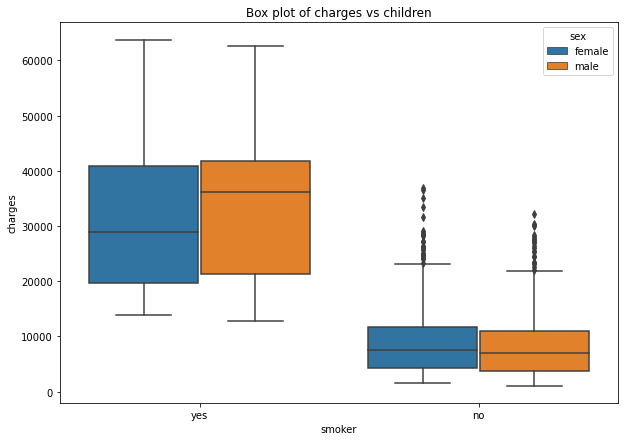

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='smoker', y='charges',hue='sex',data=df)
plt.title('Box plot of charges vs children');

Male Smoker has more charges than Female smoker
Male non smoker has less charges than Female non smoker

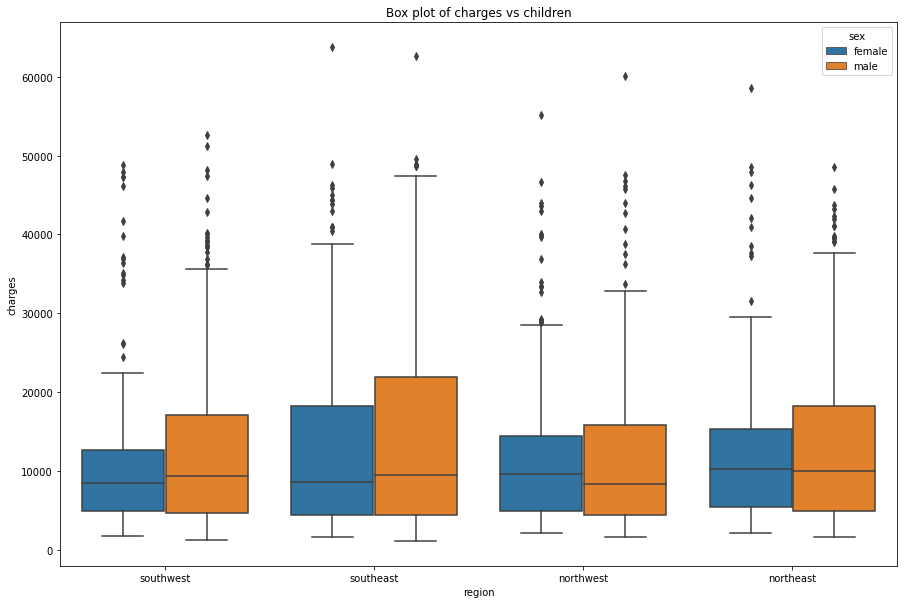

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(x='region', y='charges',hue='sex',data=df)
plt.title('Box plot of charges vs children');

Southeast region has most cahrges

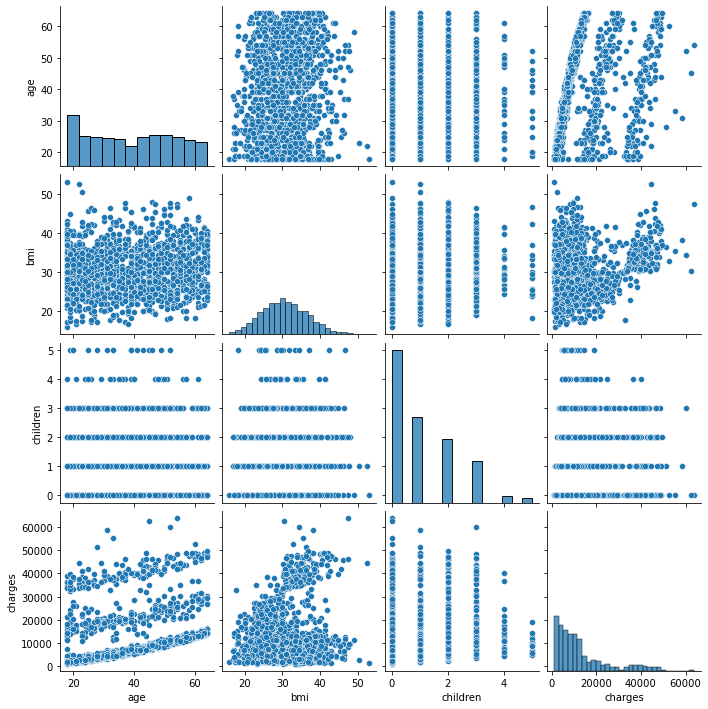

In [17]:
## Checking correlation
sns.pairplot(df)

<AxesSubplot:>

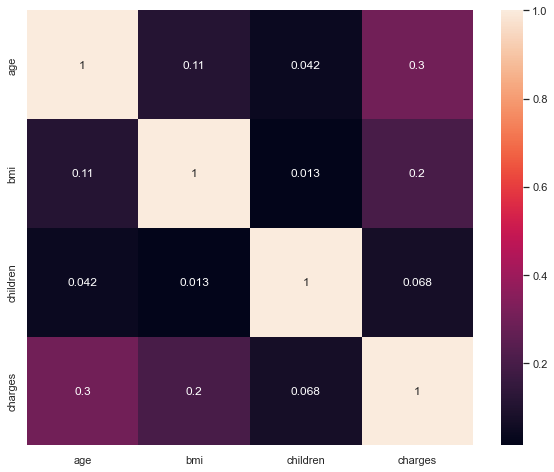

In [53]:
sns.heatmap(df.corr(),annot=True)

## Feature Engineering

In [20]:
### Dummies are good for more than 2 columns with category
df1 = pd.get_dummies(df['region'])
df = pd.concat([df, df1], axis=1).reindex(df.index) 
df.drop('region', axis=1, inplace=True)

df1 = pd.get_dummies(df['sex']) 
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('sex', axis=1, inplace=True) 

df

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,female,male
0,19,27.900,0,yes,16884.92400,0,0,0,1,1,0
1,18,33.770,1,no,1725.55230,0,0,1,0,0,1
2,28,33.000,3,no,4449.46200,0,0,1,0,0,1
3,33,22.705,0,no,21984.47061,0,1,0,0,0,1
4,32,28.880,0,no,3866.85520,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,0,0,0,1
1334,18,31.920,0,no,2205.98080,1,0,0,0,1,0
1335,18,36.850,0,no,1629.83350,0,0,1,0,1,0
1336,21,25.800,0,no,2007.94500,0,0,0,1,1,0


In [21]:
### LabelEncoder is good for YES/NO, True or False category's
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['smoker'])
df.drop("smoker", axis=1, inplace=True)
df["smoker"] = label
df

,age,bmi,children,charges,northeast,northwest,southeast,southwest,female,male,smoker
0,19,27.900,0,16884.92400,0,0,0,1,1,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,0,0,1,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,1,0,0


In [22]:
##Train Test split
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
len(X_train),len(X_test)

(936, 402)

In [24]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))

0.7545557492633161


In [25]:
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [26]:
print(lm.coef_)
print(lm.intercept_)

[  251.68186515   322.38910684   344.9642553    527.9051883
   223.81509065  -411.4369086   -340.28337035   141.3981733
  -141.3981733  24059.39047692]
-11708.541780170372


In [27]:
y_pred = lm.predict(X_test)

In [28]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.740598931692721

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 36761456.35201328
Mean Absolute Error (MAE): 4139.932064766014


Text(0, 0.5, 'y_pred')

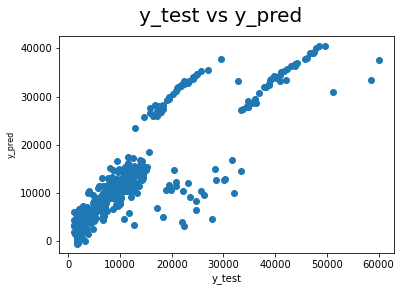

In [30]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=8)   

In [36]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
df1['sex']=pd.factorize(df1['sex'])[0]
df1['smoker']=pd.factorize(df1['smoker'])[0]
df1['region']=pd.factorize(df1['region'])[0]

In [42]:
#Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Reshape the 'charges' column into a 2D array
charges_2d = df1['charges'].values.reshape(-1, 1)

# Fit and transform the scaler on the reshaped array
scaled_charges = scaler.fit_transform(charges_2d)

# Replace the 'charges' column in the DataFrame with the scaled values
df1['charges'] = scaled_charges

In [47]:
##Train Test split
from sklearn.model_selection import train_test_split
X = df1.drop('charges',axis=1) # Independet variable
y = df1['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [48]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))

0.7544083642384213


In [49]:
y_pred = lm.predict(X_test)
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7403677168975319

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.2510818119783279
Mean Absolute Error (MAE): 0.3419369882846191


In [51]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.regplot(X_test,y_pred) #Linear Regression Line

ValueError: regplot inputs must be 1d

In [31]:
df[34:35]
test_pass = np.array([30,36.4,1,51000,0,0,0,1,0,1]).reshape(1,-1)     ## Change age 

print(lm.predict(test_pass))
#print(lm.predict_proba(test_pass))

[26955287.23409408]


In [32]:
df[34:35] #still remaining

,age,bmi,children,charges,northeast,northwest,southeast,southwest,female,male,smoker
34,28,36.4,1,51194.55914,0,0,0,1,0,1,1
